In [1]:
import pandas as pd
import numpy as np 
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")
df = pd.read_csv("D:/diploma AI/advanced_machine_learning_course_Amit/matriales/project_Data_science/bank.csv")
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [2]:
cols_to_drop = ['contact','day','month','duration','previous']
df.drop(cols_to_drop , axis=1, inplace=True)
df.head()

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
0,59,admin.,married,secondary,2343,yes,no,1,-1,yes
1,56,admin.,married,secondary,45,no,no,1,-1,yes
2,41,technician,married,secondary,1270,yes,no,1,-1,yes
3,55,services,married,secondary,2476,yes,no,1,-1,yes
4,54,admin.,married,tertiary,184,no,no,2,-1,yes


In [3]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes":dtypes, "Num_uniqe": n_uniq}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
Dtypes,int64,object,object,object,int64,object,object,int64,int64,object
Num_uniqe,76,12,3,4,3805,2,2,36,472,2


In [4]:
cat_cols = ['job','marital','education','housing','loan','deposit']
df[cat_cols] = df[cat_cols].astype('category')
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtypes":dtypes, "Num_uniqe": n_uniq}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
Dtypes,int64,category,category,category,int64,category,category,int64,int64,category
Num_uniqe,76,12,3,4,3805,2,2,36,472,2


In [5]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null_sum": null , "Ratio": ratio}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

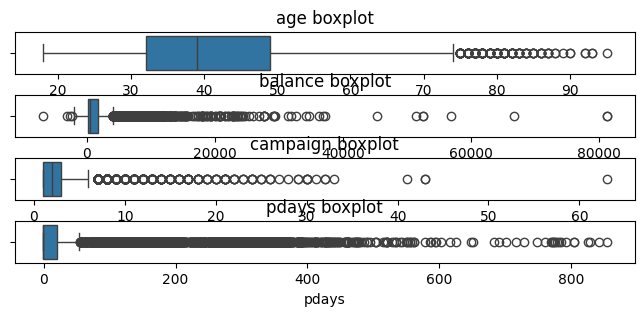

In [6]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8,3))
for i,col in enumerate(num_cols):
    plt.subplot(4,1,i+1)
    sns.boxplot(df[col],orient="h")
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=0.5, wspace=0.7)
plt.show

In [7]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3-Q1
    Lower_Fence = Q1-1.5*IQR
    upper_Fence = Q3+1.5*IQR
    Lower_outliers = df[df[col]<Lower_Fence][col].values
    upper_outliers = df[df[col]>upper_Fence][col].values
    df[col].replace(Lower_outliers, Lower_Fence, inplace = True)
    df[col].replace(upper_outliers, upper_Fence,inplace= True)

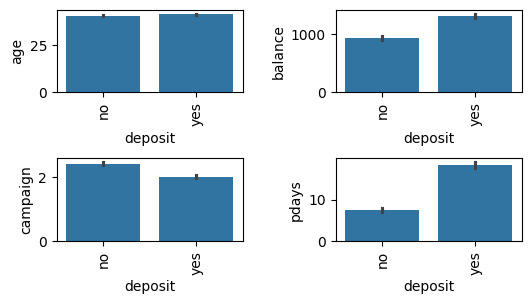

In [8]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(6,3))
for i,col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.barplot(x="deposit", y=col,data=df)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.8, wspace=0.5)
plt.show()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36
yes,631,708,123,109,1301,516,187,369,269,840,202,34


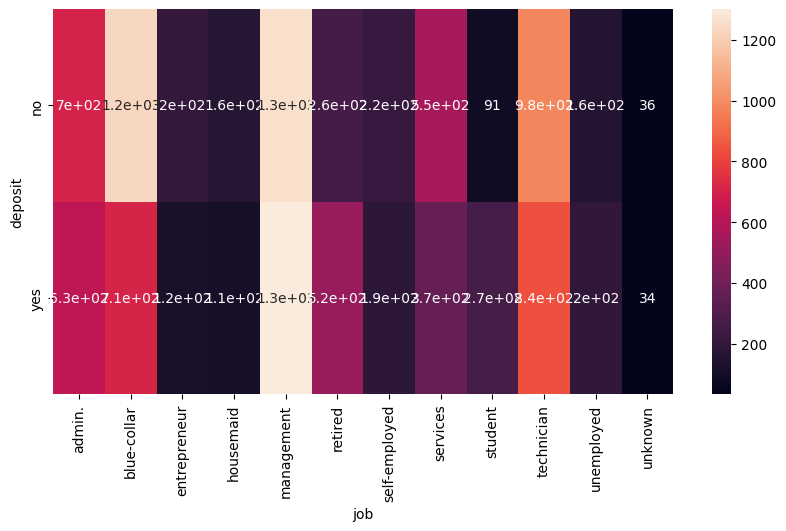

marital,divorced,married,single
deposit,,,
no,671,3596,1606
yes,622,2755,1912


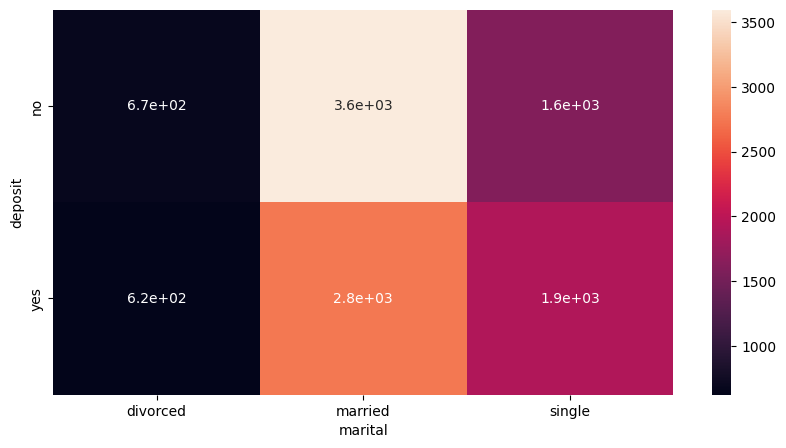

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3026,1693,245
yes,591,2450,1996,252


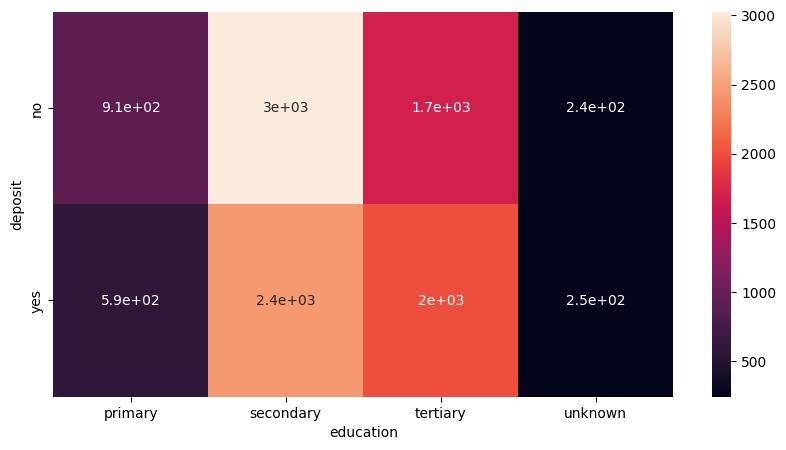

housing,no,yes
deposit,,
no,2527,3346
yes,3354,1935


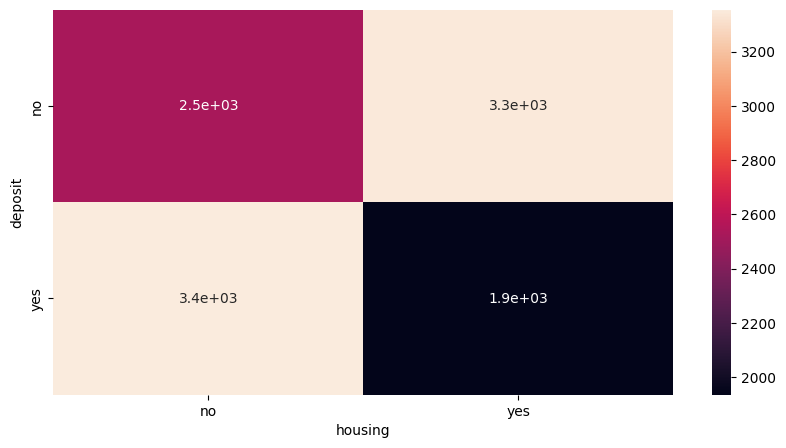

loan,no,yes
deposit,,
no,4897,976
yes,4805,484


<Axes: xlabel='loan', ylabel='deposit'>

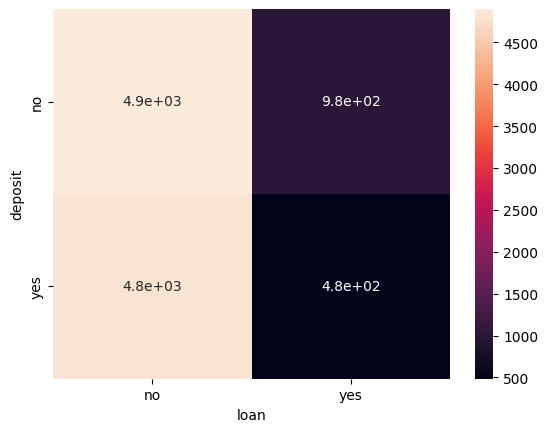

In [9]:
for col in cat_cols[:-2]:
    agg = df.pivot_table(index = "deposit" , columns=col, aggfunc = len, values="loan")
    plt.figure(figsize=(10,5))
    display(agg)
    sns.heatmap(agg, annot = True)
    plt.show()
    print("="*50)
agg = df.pivot_table(index = "deposit", columns="loan", aggfunc = len, values="marital")
display(agg)
sns.heatmap(agg, annot=True)

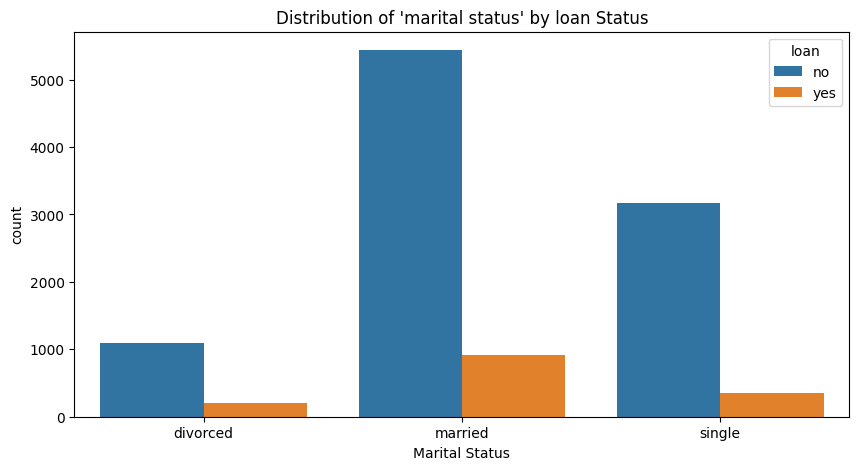

In [10]:
plt.figure(figsize=(10,5))
agg = df.groupby(["loan","marital"])["deposit"].count().reset_index()
sns.barplot(data = agg , x="marital", y="deposit", hue = "loan")
plt.title("Distribution of 'marital status' by loan Status")
plt.ylabel("count")
plt.xlabel("Marital Status")
plt.show()

In [11]:
df.duplicated().sum()

np.int64(194)

In [12]:
x = df.drop("deposit",axis = 1)
y = df[["deposit"]]

In [21]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [26]:
string_cols = ['job','marital','education','housing','loan']
pd.DataFrame(df[string_cols].nunique()).T

,job,marital,education,housing,loan
0,12,3,4,2,2


In [27]:
ordinal_cols = ['education','marital','housing','loan']
binary_cols = ['job']